In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper import *

In [21]:
#####################################
#### read and clean csv data to df ####
#####################################

#read csv to df
df_all_energy = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2021__Data_for_Calendar_Year_2020_.csv')

# filter - useful columns
cols_to_drop_energy = df_all_energy.iloc[:, 89:166].columns.tolist() + df_all_energy.columns[[2,3,8,170,171,172,239,240]].tolist() + df_all_energy.iloc[:, 187:226].columns.tolist() + df_all_energy.iloc[:, 180:216].columns.tolist() + df_all_energy.iloc[:, 232:238].columns.tolist()
df_energy = df_all_energy.drop(columns=cols_to_drop_energy)
df_energy.to_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/nyc_energy.csv', index=False)

ll84_all = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/nyc_energy.csv')
ll84_all['NYC Borough, Block and Lot (BBL)'] = ll84_all['NYC Borough, Block and Lot (BBL)'].apply(lambda x: pd.to_numeric(x, errors='coerce') if x != 'Not Available' else np.nan)
print_df_info(ll84_all)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_68839/2887431767.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  ll84_all = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/nyc_energy.csv')


Data shape: (28067, 113)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
2         8604                  114  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
2              114  West  47th  st 

In [22]:
pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')
print_df_info(pluto)

/var/folders/x5/bpzm5rm93fz73p0v851qytl80000gn/T/ipykernel_68839/2317958079.py:1: DtypeWarning: Columns (17,18,20,22,24,25,52) have mixed types. Specify dtype option on import or set low_memory=False.
  pluto = pd.read_csv('/Users/luchen/Documents/MSUA/2023Spring/Capstone/datasets/PLUTO/Primary_Land_Use_Tax_Lot_Output__PLUTO_.csv')


Data shape: (858619, 101)
Data head:
  borough  block  lot  community board  census tract 2010  cb2010  schooldist  \
0      BK   1809   16            303.0              265.0  2001.0        13.0   
1      BK   6183   33            311.0              266.0  3000.0        20.0   
2      BK   6206   22            311.0              268.0  3000.0        20.0   
3      BK   1852   37            303.0              269.0  1001.0        13.0   
4      BK   5893    8            310.0              130.0  2001.0        20.0   

   council district  postcode firecomp  ...  landmkdate  basempdate  masdate  \
0              36.0   11216.0     E235  ...         NaN         NaN      NaN   
1              47.0   11204.0     L168  ...         NaN         NaN      NaN   
2              47.0   11204.0     L168  ...         NaN         NaN      NaN   
3              36.0   11216.0     E235  ...         NaN         NaN      NaN   
4              43.0   11209.0     L109  ...         NaN         NaN      NaN

In [23]:
# merge pluto and ll84 data on BBL
joined_df = pd.merge(ll84_all, pluto, how='left', left_on='NYC Borough, Block and Lot (BBL)', right_on='bbl')
joined_df = joined_df.drop(columns=['bbl'])
print_df_info(joined_df)

Data shape: (28067, 213)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
2         8604                  114  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
2                      1.009990e+09                                  1022667   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
2              114  West  47th  st 

In [24]:
# filter buildings
office_joined = joined_df[(joined_df['Primary Property Type - Self Selected'] == 'Office')]
print_df_info(office_joined)

Data shape: (2347, 213)
Data head:
   Property Id        Property Name Year Ending  \
0         7365                 1155  12/31/2020   
1         8139                  200  12/31/2020   
3         8841                  733  12/31/2020   
4        11809  Conde Nast Building  12/31/2020   
9      1052478         140 Broadway  12/31/2020   

   NYC Borough, Block and Lot (BBL) NYC Building Identification Number (BIN)  \
0                      1.009970e+09                                  1022631   
1                      1.013150e+09                                  1037545   
3                      1.013190e+09                                  1037596   
4                      1.009950e+09                                  1085682   
9                      1.000480e+09                                  1001027   

                         Address 1 Postcode  \
0  1155  Avenue  of  the  Americas    10036   
1             200  East  42nd  St.    10017   
3               733  Third  Avenue  

count              2347
unique             1004
top       Not Available
freq                 52
Name: Site EUI (kBtu/ft²), dtype: object


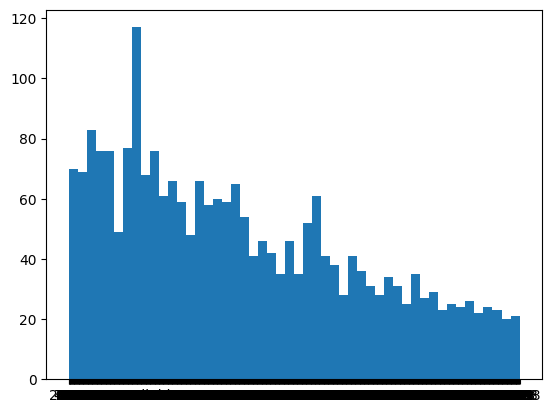

0


In [32]:
# run a simple descriptive analysis on 'Weather Normalized Site EUI (kBtu/ft²)'
# discri_analysis(office_joined, 'Weather Normalized Site EUI (kBtu/ft²)')
print(office_joined['Site EUI (kBtu/ft²)'].describe())
plt.hist(office_joined['Site EUI (kBtu/ft²)'], bins=50)
plt.show()
print(office_joined['Site EUI (kBtu/ft²)'].isna().sum())